In [122]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [123]:
#Get the Dataset
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\AI_Lab\\ADANIPORTS.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3322 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3322 non-null   object 
 1   Series              3322 non-null   object 
 2   Prev Close          3322 non-null   float64
 3   Open                3322 non-null   float64
 4   High                3322 non-null   float64
 5   Low                 3322 non-null   float64
 6   Last                3322 non-null   float64
 7   Close               3322 non-null   float64
 8   VWAP                3322 non-null   float64
 9   Volume              3322 non-null   int64  
 10  Turnover            3322 non-null   float64
 11  Trades              2456 non-null   float64
 12  Deliverable Volume  3322 non-null   int64  
 13  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 389.3+ KB


In [124]:
df.isnull()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2007-11-28,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2007-11-29,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2007-11-30,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2007-12-03,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-04-27,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2021-04-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [125]:
df['Trades'] = df['Trades'].fillna(method = 'bfill')
df['Trades']

Date
2007-11-27     19171.0
2007-11-28     19171.0
2007-11-29     19171.0
2007-11-30     19171.0
2007-12-03     19171.0
                ...   
2021-04-26    116457.0
2021-04-27    236896.0
2021-04-28    130847.0
2021-04-29    153293.0
2021-04-30    132141.0
Name: Trades, Length: 3322, dtype: float64

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,19171.0,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,19171.0,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,19171.0,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,19171.0,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,19171.0,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203


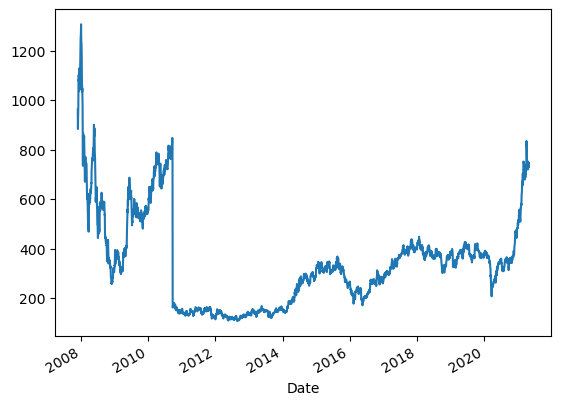

In [126]:
df['Close'].plot()
df

In [127]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ',df.shape)
print('Null Value Present: ',df.isnull().values.any())

Dataframe Shape:  (3322, 14)
Null Value Present:  False


In [128]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [129]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2007-11-27,0.550634,0.774216,0.570576,0.279227
2007-11-28,0.728634,0.724774,0.659896,0.046763
2007-11-29,0.666251,0.662766,0.631554,0.052318
2007-11-30,0.650447,0.698406,0.673638,0.047054
2007-12-03,0.691828,0.728895,0.701121,0.030347


In [130]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [131]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [132]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='Adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [134]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
378/378 [==============================] - 1s 2ms/step - loss: 79.3734
Epoch 2/100
378/378 [==============================] - 1s 2ms/step - loss: 78.4763
Epoch 3/100
378/378 [==============================] - 1s 2ms/step - loss: 77.5885
Epoch 4/100
378/378 [==============================] - 1s 2ms/step - loss: 76.7119
Epoch 5/100
378/378 [==============================] - 1s 2ms/step - loss: 75.8483
Epoch 6/100
378/378 [==============================] - 1s 2ms/step - loss: 74.9995
Epoch 7/100
378/378 [==============================] - 1s 2ms/step - loss: 74.1670
Epoch 8/100
378/378 [==============================] - 1s 2ms/step - loss: 73.3523
Epoch 9/100
378/378 [==============================] - 1s 2ms/step - loss: 72.5567
Epoch 10/100
378/378 [==============================] - 1s 2ms/step - loss: 71.7812
Epoch 11/100
378/378 [==============================] - 1s 2ms/step - loss: 71.0269
Epoch 12/100
378/378 [==============================] - 1s 2ms/step - loss: 70.2946
E

378/378 [==============================] - 1s 2ms/step - loss: 52.7611
Epoch 99/100
378/378 [==============================] - 1s 2ms/step - loss: 52.6805
Epoch 100/100
378/378 [==============================] - 1s 2ms/step - loss: 52.5999


In [138]:
y_pred= lstm.predict(X_test)

10/10 [==============================] - 0s 1ms/step


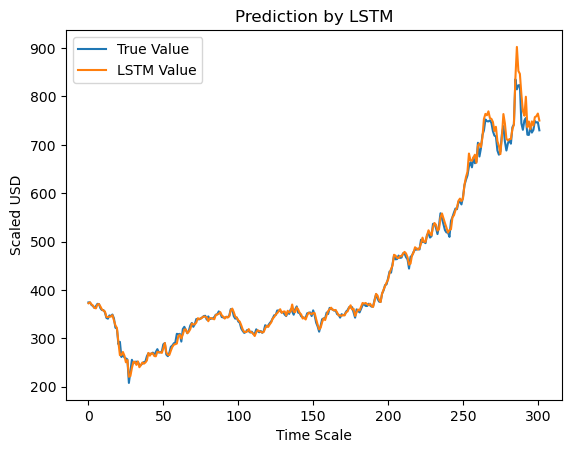

In [141]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()